<a href="https://colab.research.google.com/github/mdasadul/indaba-2018-pytorch/blob/master/MachineLearningBasicsIndabaPytorch0_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch

    100% |████████████████████████████████| 519.5MB 29kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x59a82000 @  0x7f39b031b2a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070


In [0]:
import numpy as np
import pdb

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


%matplotlib inline

Text(0,0.5,'x2')

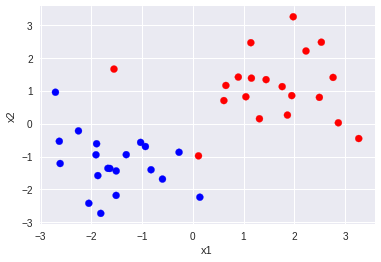

In [3]:
centre = 1    #@param {type:"slider", min:0, max:2, step:0.1}

points_in_class = 20  # How many points we want per class

# A fixed random seed is a common "trick" used in ML that allows us to recreate
# the same data when there is a random element involved. 
np.random.seed(0)  

# Generate random points in the "red" class
red_inputs = np.random.normal(loc=centre, scale=1.0, size=[points_in_class, 2])     
# Generate random points in the "blue" class
blue_inputs = np.random.normal(loc=-centre, scale=1.0, size=[points_in_class, 2])    
# Put these together
inputs = np.concatenate((red_inputs, blue_inputs), axis=0) 
    
# The class (label) is 1 for red or 0 for blue
red_labels = np.ones(points_in_class)    
blue_labels = np.zeros(points_in_class)
labels = np.concatenate((red_labels, blue_labels), axis=0)

# num_data_points is the total data set size
num_data_points = 2 * points_in_class
#print(inputs.shape)
plt.scatter(inputs[:num_data_points,0],inputs[:num_data_points,1],c=['blue' if label==0 else 'red' for label in labels])
#, labels)

plt.xlabel('x1')
plt.ylabel('x2')

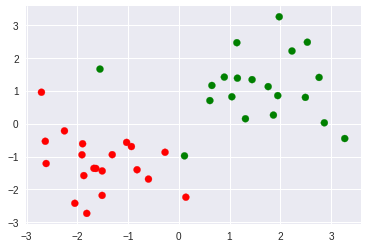

In [4]:
fig, ax = plt.subplots()

ax.scatter(inputs[:,0], inputs[:,1], c=['red' if pix ==0 else 'green' for pix in labels])

In [0]:
X = torch.from_numpy(inputs).float()
y = torch.from_numpy(labels.reshape(num_data_points,1)).float()

In [6]:
class BinaryClassification(nn.Module):
  def __init__(self, input_dim):
    super(BinaryClassification, self).__init__()
    self.lin1 = nn.Linear(input_dim,10)
    self.lin2 = nn.Linear(10,1)
    
   
  def forward(self, X):
    return torch.sigmoid(self.lin2(self.lin1(X)))

model = BinaryClassification(2)

print(model)

BinaryClassification(
  (lin1): Linear(in_features=2, out_features=10, bias=True)
  (lin2): Linear(in_features=10, out_features=1, bias=True)
)


In [0]:
def accuracy(y_, y):
  return accuracy_score((y_ > 0.5).astype(int),y)
 

Loss = 0.04 Accuracy = 0.975
Loss = 0.04 Accuracy = 0.975
Loss = 0.04 Accuracy = 0.975
Loss = 0.04 Accuracy = 0.975
Loss = 0.04 Accuracy = 0.975


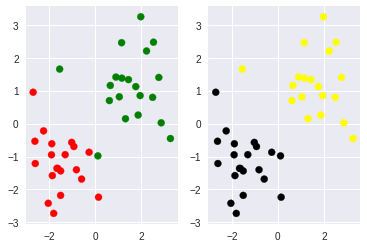

In [23]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=0.1)

for i in range(10):
  optimizer.zero_grad()
  y_ = model(X)
  loss = criterion(y_,y)
  loss.backward()
  optimizer.step()
  if i%2 ==0: 
    #pdb.set_trace()
    print("Loss = %.2f Accuracy = %0.3f"%(loss.data.numpy(),accuracy(y_.data.numpy(),y.data.numpy())))


with torch.no_grad():
  y_=model(X)

fig, (ax1,ax2)=plt.subplots(nrows=1, ncols=2)

ax1.scatter(inputs[:,0], inputs[:,1], c=['red' if pix ==0 else 'green' for pix in labels])
ax2.scatter(inputs[:,0], inputs[:,1], c=['yellow' if pix > 0.5 else 'black' for pix in y_])

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-x))


Loss =0.064 accuracy = 97.500
Loss =0.063 accuracy = 97.500
Loss =0.062 accuracy = 97.500
Loss =0.061 accuracy = 97.500
Loss =0.061 accuracy = 97.500
Loss =0.060 accuracy = 97.500
Loss =0.059 accuracy = 95.000
Loss =0.058 accuracy = 95.000
Loss =0.058 accuracy = 95.000
Loss =0.057 accuracy = 95.000


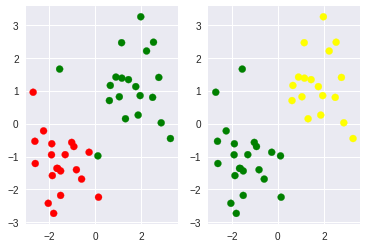

In [28]:
#training loop
lr = 0.001
weights = np.array([0.1,0.1]).reshape(2,1)
y_hat = np.zeros(40).reshape(40,1)
for i in range(100):
  y_hat =  sigmoid(np.dot(inputs,weights))
  #   pdb.set_trace()
  #print(y_hat)
  loss = labels.reshape(40,1)- y_hat
  update = lr*loss.sum()
  weights[0,0] += update*inputs[:,0].sum()
  weights[1,0] += update*inputs[:,1].sum()
  if i%10 ==0:
    #pdb.set_trace()
    print('Loss =%0.3f accuracy = %.3f'%(loss.sum(),accuracy(y_hat, labels)*100))
    
#print(y_hat)
fig, (ax3,ax4)=plt.subplots(nrows=1, ncols=2)

ax3.scatter(inputs[:,0], inputs[:,1], c=['red' if pix ==0 else 'green' for pix in labels])
ax4.scatter(inputs[:,0], inputs[:,1], c=['yellow' if (pix > 0.5).astype(bool) else 'green' for pix in y_hat])